
# Preprocessing Melakukan Gathering Data, Resize Image

Plot Random Image tiap Kelas Menampilkan gambar random tiap kelas

In [1]:
# *
import os
import cv2
import shutil
import random
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
# u/ Preprocessing data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu, sigmoid
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img

Mengatur lokasi / path data

In [3]:
training_dir = r"D:\Simulasi\CASFOD\dataset_prewit\train"
validation_dir = r"D:\Simulasi\CASFOD\dataset_prewit\val"
testing_dir = r"D:\Simulasi\CASFOD\dataset_prewit\test"

categories = [
'Tp',
'Au'
]

In [4]:
# Mendeklarasikan ukuran gambar
img_size = (128,128)

training_data = []
validation_data = []
testing_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(training_dir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,img_size) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

def create_validation_data():
    for category in categories:
        path = os.path.join(validation_dir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,img_size) 
                validation_data.append([new_array,class_num])
            except Exception as e:
                pass

def create_testing_data():
    for category in categories:
        path = os.path.join(testing_dir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,img_size) 
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass


create_training_data()
print("Berhasil Create Training Data")
create_validation_data()
print("Berhasil Create Validation Data")
create_testing_data()
print("Berhasil Create Testing Data")

Berhasil Create Training Data
Berhasil Create Validation Data
Berhasil Create Testing Data


In [5]:
# Melakukan pengambilan features/gambar dan label dari masing" kelas

X_train = []
Y_train = []
for features,label in training_data:
    X_train.append(features)
    Y_train.append(label)
X_train = np.array(X_train).reshape(-1,128,128)
X_train = X_train.astype('float32')  
X_train = X_train.reshape(-1,128,128,3)
print(X_train.shape)

X_val = []
Y_val = []
for features,label in validation_data:
    X_val.append(features)
    Y_val.append(label)
X_val = np.array(X_val).reshape(-1,128,128)
X_val = X_val.astype('float32')  
X_val = X_val.reshape(-1,128,128,3)
print(X_val.shape)

X_test = []
Y_test = []
for features,label in testing_data:
    X_test.append(features)
    Y_test.append(label)
X_test = np.array(X_test).reshape(-1,128,128)
X_test = X_test.astype('float32')  
X_test = X_test.reshape(-1,128,128,3)
print(X_test.shape)

(6994, 128, 128, 3)
(2080, 128, 128, 3)
(974, 128, 128, 3)


Labeling Data menggunakan label encoder untuk Y_train/val/test

In [6]:
lb = LabelEncoder()

Y_train = lb.fit_transform(Y_train)
Y_val = lb.fit_transform(Y_val)
Y_test = lb.fit_transform(Y_test)

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
Y_train_one_hot = to_categorical(Y_train)
Y_val_one_hot=to_categorical(Y_val)
Y_test_one_hot = to_categorical(Y_test)

In [9]:
print(Y_train_one_hot.shape)

(6994, 2)


In [10]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import itertools
import warnings
warnings.filterwarnings("ignore")

In [11]:
numberOfClass=len(glob(training_dir+'/*/'))
numberOfClass

2

In [12]:
IMAGE_SIZE = [128, 128]

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation=relu, input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
   # Dropout(0.5),
    Conv2D(64, (3,3), activation=relu),  
    MaxPooling2D(pool_size=(2,2)),
   # Dropout(0.5),
    Conv2D(64, (3,3), activation=relu), 
    MaxPooling2D(pool_size=(2,2)),
   # Dropout(0.5),
    Conv2D(128, (3,3), activation=relu), 
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation=relu), 
    MaxPooling2D(pool_size=(2,2)),
   # Dropout(0.5),
    Flatten(),
   
   #Dense(128, activation=relu),
    #Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='sigmoid')
])

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [15]:
import tensorflow as tf
run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
# tell the model what cost and optimization method to use
opti = tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum = 0.01)

model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
  experimental_run_tf_function = run_opts  
)

In [17]:
earlyStopping = EarlyStopping(
    monitor='val_accuracy',
    mode='auto', 
    baseline=None, 
    restore_best_weights=True, 
    patience = 20,
    verbose = 1
)

In [18]:
epochs=100
batch_size=10

In [19]:
hist=model.fit(X_train,Y_train_one_hot, 
                steps_per_epoch=batch_size, 
                epochs=epochs, 
                validation_data=(X_val,Y_val_one_hot),
                validation_steps=batch_size,
                callbacks=[earlyStopping]
              )

Epoch 1/100
10/10 [==============================] - 302s 27s/step - loss: 5.4711 - accuracy: 0.7428 - val_loss: 0.6195 - val_accuracy: 0.8231
Epoch 2/100
10/10 [==============================] - 200s 20s/step - loss: 0.5711 - accuracy: 0.7878 - val_loss: 0.4893 - val_accuracy: 0.8236
Epoch 3/100
10/10 [==============================] - 183s 18s/step - loss: 0.5218 - accuracy: 0.7907 - val_loss: 0.4751 - val_accuracy: 0.8240
Epoch 4/100
10/10 [==============================] - 157s 16s/step - loss: 0.5152 - accuracy: 0.7908 - val_loss: 0.4705 - val_accuracy: 0.8240
Epoch 5/100
10/10 [==============================] - 155s 16s/step - loss: 0.5092 - accuracy: 0.7911 - val_loss: 0.4681 - val_accuracy: 0.8240
Epoch 6/100
10/10 [==============================] - 152s 15s/step - loss: 0.5043 - accuracy: 0.7912 - val_loss: 0.4659 - val_accuracy: 0.8240
Epoch 7/100
10/10 [==============================] - 171s 17s/step - loss: 0.4998 - accuracy: 0.7911 - val_loss: 0.4645 - val_accuracy: 0.8240

In [20]:
model.save("CASFOD128(prewit).h5")

In [21]:
def predictClasses(predictions):
    valResult = predictions.copy()
    valResult[valResult <= 0.5] = 0
    valResult[valResult > 0.5] = 1
    return valResult

def plotHistory(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy history')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss history')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

def plotConfusionMatrix(predictions, labels):
    valResult = predictClasses(predictions)
    confMatrixdf = pd.DataFrame(
        confusion_matrix(labels, valResult),
        index=["Palsu", "Asli"],
        columns=["Pred. Impostor", "Pred. Impostor"]
    )

    plt.title("Confusion Matrix")
    #sn.heatmap(confMatrixdf, annot=True, annot_kws={"size" : "20"})
    sn.heatmap(confMatrixdf,annot=True,cmap='Blues', fmt='g')

def plotROCCurve(predictions, labels):
    fpr, tpr, thresholds = roc_curve(labels, predictions)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot(fpr, tpr, 'b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()

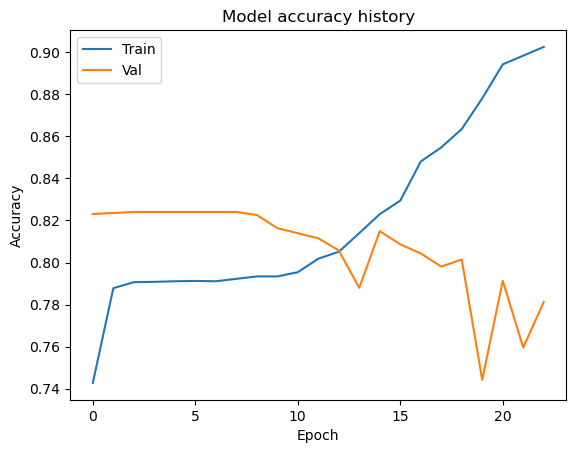

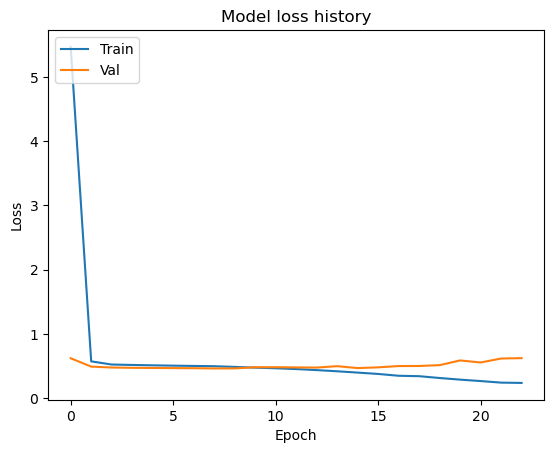

In [22]:
plotHistory(hist)

In [23]:
model.evaluate(X_train,Y_train_one_hot)

219/219 [==============================] - 43s 191ms/step - loss: 0.5141 - accuracy: 0.7910


[0.5141410827636719, 0.7909637093544006]

In [24]:
model.evaluate(X_val,Y_val_one_hot)

65/65 [==============================] - 13s 195ms/step - loss: 0.4751 - accuracy: 0.8240


[0.4750925600528717, 0.8240384459495544]

In [25]:
test_model = keras.models.load_model('CASFOD128(prewit).h5')
test_loss, test_acc = test_model.evaluate(X_test,Y_test_one_hot)
print('Test accuracy: %.4f' % (test_acc,))

31/31 [==============================] - 7s 201ms/step - loss: 0.5086 - accuracy: 0.7906
Test accuracy: 0.7906


In [26]:
y_actual, y_test = [], []

In [27]:
import os, cv2

In [29]:
img_path="D:\\Simulasi\\CASFOD\\dataset_prewit\\val\\Tp"
img_list= os.listdir(img_path)

In [30]:
for img in img_list:
        input_img=cv2.imread(img_path + '/'+ img)
        img=image.img_to_array(input_img)
        img=np.expand_dims(img,axis=0)
        pred=(test_model.predict(img)>0.5).astype("int32")
        y_test.append(pred[0,0])
        y_actual.append(1)

1/1 [==============================] - 0s 43ms/step


In [31]:
img_path="D:\\Simulasi\\CASFOD\\dataset_prewit\\val\\Au"
img_list= os.listdir(img_path)

In [32]:
for img in img_list:
        input_img=cv2.imread(img_path + '/'+ img)
        img=image.img_to_array(input_img)
        img=np.expand_dims(img,axis=0)
        pred=(test_model.predict(img)>0.5).astype("int32")
        y_test.append(pred[0,0])
        y_actual.append(0)

1/1 [==============================] - 0s 93ms/step


In [33]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_test,y_actual)

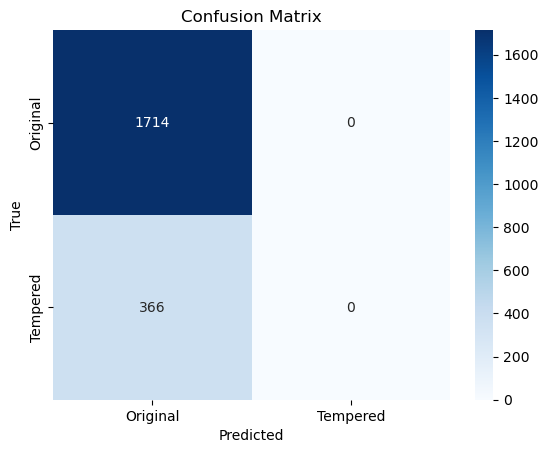

In [35]:
ax=plt.subplot()
cn=confusion_matrix(y_actual,y_test)
#sns.heatmap(cn,cmap="RdPu",annot=True)
sns.heatmap(cn,annot=True,cmap='Blues', fmt='g')
ax.set_xlabel('Predicted'); ax.set_ylabel('True');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Original','Tempered']);
ax.yaxis.set_ticklabels(['Original','Tempered']);

In [36]:
# from the confusion matrix
TP = true_pos =1714
TN = true_neg =0
FP = false_pos =366
FN = false_neg =0

In [37]:
results = {}

In [38]:
# Classification Accuracy

metric = "Validation Accuracy"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .4f}")

Validation Accuracy is  0.8240


In [39]:
# Recall: When the actual value is positive, how often is the prediction correct?
recall = TP / float(TP + FN)
print("Recall:",TP / float(TP + FN))

Recall: 1.0


In [40]:
# Specificity: When the actual value is negative, how often is the prediction correct?

print("Specificity",TN / float(TN + FP))

Specificity 0.0


In [41]:
# Precision: When a positive value is predicted, how often is the prediction correct?
precision = TP / float(TP + FP)
print("Precision", TP / float(TP + FP))

Precision 0.8240384615384615


In [42]:
# F1 Score

print("F1 Score:", (2 * (precision * recall) / (precision + recall)))

F1 Score: 0.9035318924617818


In [43]:
# u/ Evaluasi Model
import itertools
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn.metrics import  precision_recall_curve, auc, roc_curve, roc_auc_score

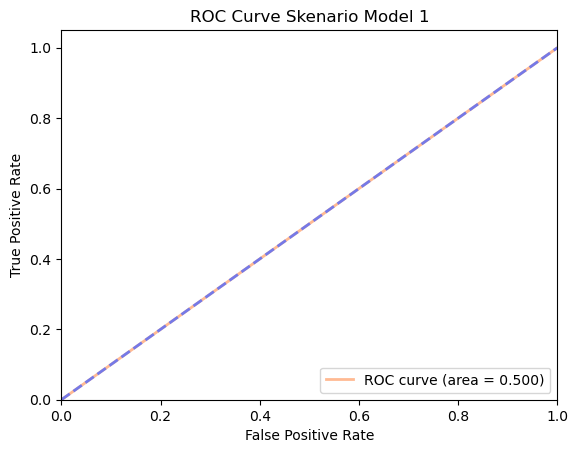

In [44]:
fpr,tpr,_=roc_curve(y_actual,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#ffba93',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#7579e7', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Skenario Model 1')
plt.legend(loc="lower right")
plt.show()

In [45]:
print(classification_report(y_actual, y_test, target_names = categories))

              precision    recall  f1-score   support

          Tp       0.82      1.00      0.90      1714
          Au       0.00      0.00      0.00       366

    accuracy                           0.82      2080
   macro avg       0.41      0.50      0.45      2080
weighted avg       0.68      0.82      0.74      2080



In [46]:
y_actual, y_test = [], []

In [49]:
img_path="D:\\Simulasi\\CASFOD\\dataset_prewit\\test\\Tp"
img_list= os.listdir(img_path)

In [50]:
for img in img_list:
        input_img=cv2.imread(img_path + '/'+ img)
        img=image.img_to_array(input_img)
        img=np.expand_dims(img,axis=0)
        pred=(test_model.predict(img)>0.5).astype("int32")
        y_test.append(pred[0,0])
        y_actual.append(1)

1/1 [==============================] - 0s 60ms/step


In [51]:
img_path2="D:\\Simulasi\\CASFOD\\dataset_prewit\\test\\Au"
img_list= os.listdir(img_path2)

In [52]:
for img in img_list:
        input_img=cv2.imread(img_path2 + '/'+ img)
        img=image.img_to_array(input_img)
        img=np.expand_dims(img,axis=0)
        pred=(test_model.predict(img)>0.5).astype("int32")
        y_test.append(pred[0,0])
        y_actual.append(0)

1/1 [==============================] - 0s 69ms/step


In [53]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_test,y_actual)

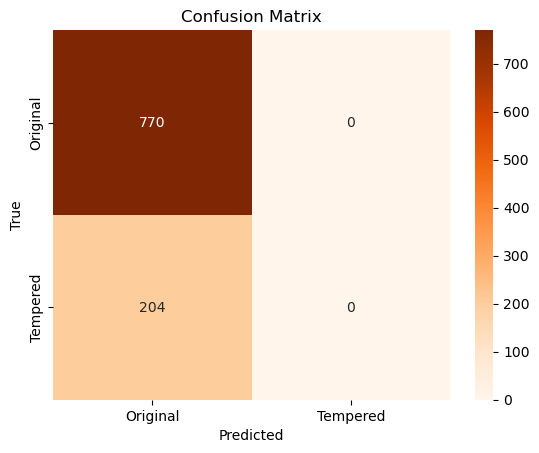

In [55]:
ax=plt.subplot()
cn=confusion_matrix(y_actual,y_test)
#sns.heatmap(cn,cmap="RdPu",annot=True)
sns.heatmap(cn,annot=True,cmap='Oranges', fmt='g')
ax.set_xlabel('Predicted'); ax.set_ylabel('True');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Original','Tempered']);
ax.yaxis.set_ticklabels(['Original','Tempered']);

In [56]:
# from the confusion matrix
TP = true_pos =770
TN = true_neg =0
FP = false_pos =204
FN = false_neg =0

In [57]:
results = {}

In [58]:
# Classification Accuracy

metric = "Test Accuracy"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .4f}")

Test Accuracy is  0.7906


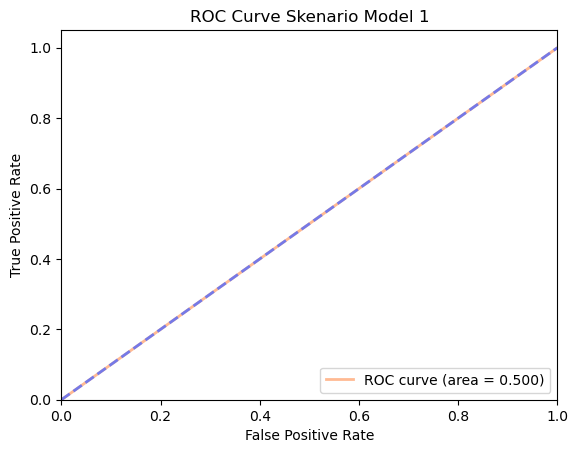

In [59]:
fpr,tpr,_=roc_curve(y_actual,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#ffba93',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#7579e7', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Skenario Model 1')
plt.legend(loc="lower right")
plt.show()
fpr,tpr,_=roc_curve(y_actual,y_test)
roc_auc = auc(fpr, tpr)


In [60]:
print(classification_report(y_actual, y_test, target_names = categories))

              precision    recall  f1-score   support

          Tp       0.79      1.00      0.88       770
          Au       0.00      0.00      0.00       204

    accuracy                           0.79       974
   macro avg       0.40      0.50      0.44       974
weighted avg       0.62      0.79      0.70       974

